# Example Exploration

This activity is meant to serve as a motivator for your first project involving an **Exploratory Data Analysis** notebook posted to **GitHub**.  We will use the example of housing data frequently in the class.  This is an example drawn from the excellent book [Hands on Machine Learning with Python]() by Ariel Guron.  Our goal is to load and explore the data.  We have some missing values we want to consider, and also we want to brainstorm about new columns we can create.  Additionally, we want to explore the distributions of variables and transform any worthy of treatment.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns

In [5]:
from sklearn.datasets import fetch_california_housing

In [6]:
cali = fetch_california_housing()

In [8]:
print(cali.DESCR)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [9]:
df = pd.DataFrame(cali.data, columns=cali.feature_names)

In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
dtypes: float64(8)
memory usage: 1.3 MB


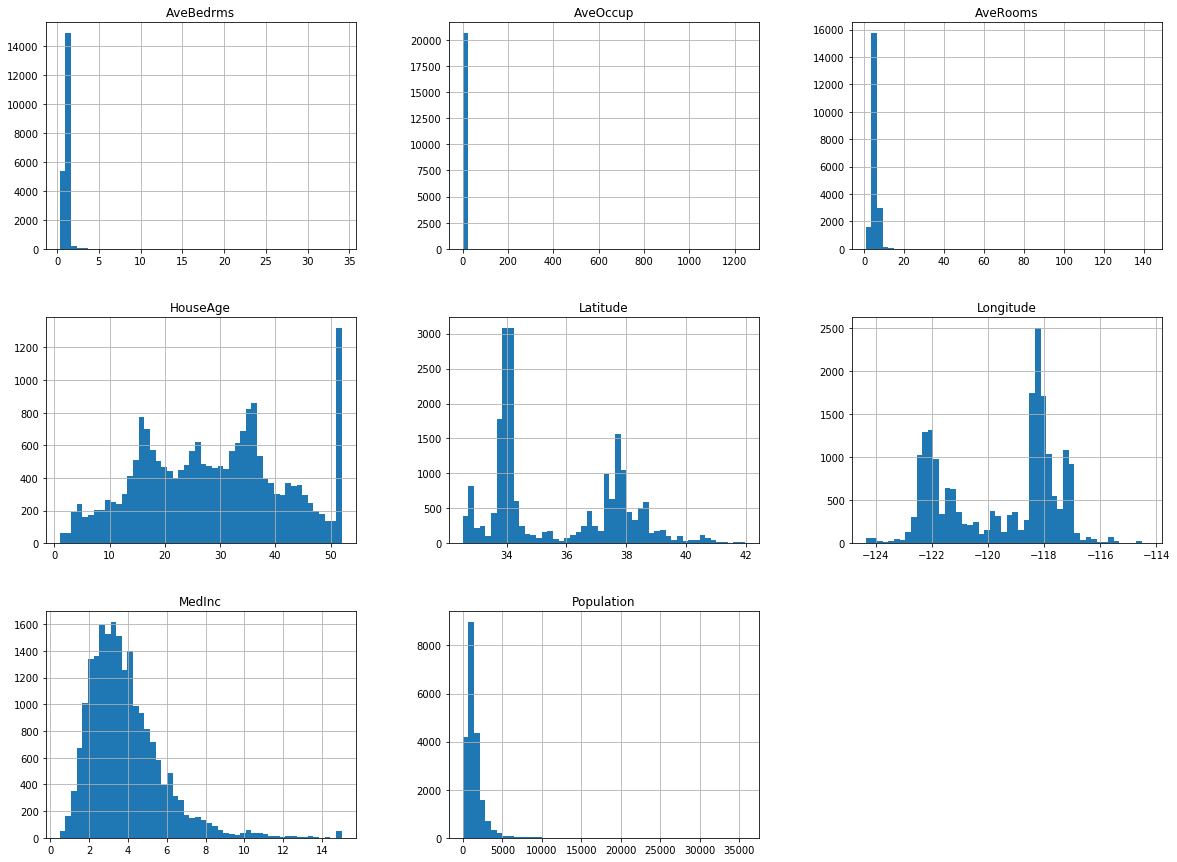

In [13]:
df.hist(bins=50, figsize=(20,15));

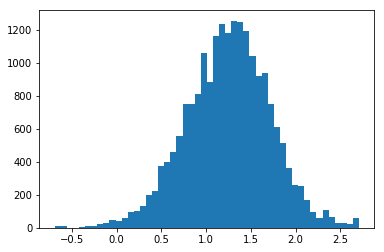

In [16]:
plt.hist(np.log(df.MedInc), bins = 50);

In [17]:
df.MedInc.skew()

1.6466567021344465

In [18]:
np.log(df.MedInc).skew()

-0.14608181157738848

### Problem

1. Draw a scatter plot of the houses location, coloring them based on the median house value.
1. Transform the tail heavy distributions using mathematical operations.
2. Create three new columns:
   1. `rooms_per_household`
   2. `bedrooms_per_room`
   3. `population_per_household`
   
3. Drop values where na's are missing, assign this DataFrame to `dropped_houses`.
4. Replace missing values with mean or median values, assign this to `replaced_houses`.

Text(0.5,1,'Location Colored by Median Income')

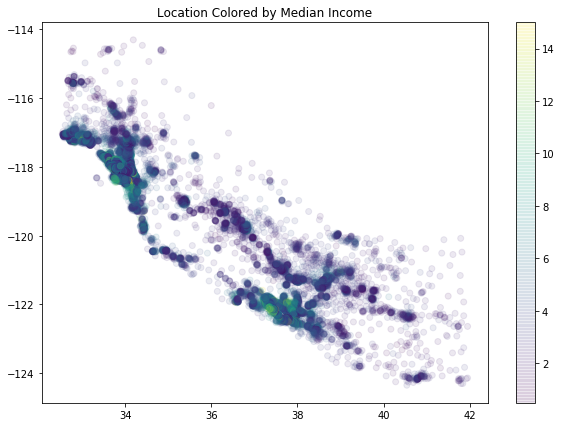

In [23]:
plt.figure(figsize = (10, 7))
plt.scatter(df.Latitude, df.Longitude, c = df.MedInc, alpha = 0.1)
plt.colorbar()
plt.title('Location Colored by Median Income')

In [24]:
log_beds = np.log(df.AveBedrms)

In [25]:
print('The skew of the original column was', df.AveBedrms.skew(), '\nThe skew of the transformed data is ', log_beds.skew())

The skew of the original column was 31.316956246782663 
The skew of the transformed data is  6.406004149216977


In [26]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [27]:
df['rooms_by_household'] = df.AveRooms * df.AveOccup

In [28]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,rooms_by_household
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,17.848325
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,13.161483
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,23.225510
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,14.822293
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,13.703657


### Your EDA Project

1. A Jupyter Notebook titled `EDA_project_I.ipynb` housed in a **GitHub** repository specifically for projects in this class.
2. Clear Definition of the Data and Data Types
3. Visualizations and explorations of descriptive statistics
4. Transformations and Discussion
5. New Variables and Correlation Explorations
